In [12]:
import pandas as pd

# Load CSV files into DataFrames
Market_Stats_df = pd.read_excel('data/Market_Per_State.xlsx')

Market_Stats_df

,State,Job_openings_rate,Job_openings_level,Hires_rate,Hires_level,Total_separations_rate,Total_separations_level,Quits_rate,Quits_level,Layoffs_and_discharges_rate,Layoffs_and_discharges_level,Unemployed_persons_per_job_opening_rate
0,Alabama,4.7,108,3.6,79,3.2,70,2.2,48,0.9,19,0.7
1,Alaska,5.6,20,5.3,18,4.7,16,2.7,9,1.5,5,0.8
2,Arizona,5.0,170,3.6,118,3.4,111,2.0,64,1.2,39,0.9
3,Arkansas,5.2,76,3.8,52,3.3,46,2.3,32,0.9,12,0.7
4,California,3.5,659,2.8,509,3.1,564,2.0,359,1.0,184,1.6
5,Colorado,4.7,145,4.5,135,3.6,107,2.1,62,1.4,42,1.1
6,Connecticut,4.1,73,3.1,53,3.9,66,2.1,36,1.5,26,1.0
7,Delaware,4.3,22,3.6,18,3.6,18,2.2,11,1.2,6,0.9
8,District of Columbia,3.4,27,2.3,18,2.6,20,1.8,14,0.8,6,0.9
9,Florida,4.1,433,3.5,348,3.4,339,2.4,240,0.8,84,0.9


In [ ]:
from scipy.stats import zscore

# Z-score normalization: Add (↑ = More Freeze)
Market_Stats_df['Unemployed_Per_Job_Opening_ZScore'] = zscore(
    Market_Stats_df['Unemployed_persons_per_job_opening_rate'], nan_policy='omit')
Market_Stats_df['Layoffs_Rate_ZScore'] = zscore(
    Market_Stats_df['Layoffs_and_discharges_rate'], nan_policy='omit')
Market_Stats_df['Separations_Rate_ZScore'] = zscore(
    Market_Stats_df['Total_separations_rate'], nan_policy='omit')

# Z-score normalization: Subtract (↓ = More Freeze)
Market_Stats_df['Job_Openings_Rate_ZScore'] = zscore(
    Market_Stats_df['Job_openings_rate'], nan_policy='omit')
Market_Stats_df['Hires_Rate_ZScore'] = zscore(
    Market_Stats_df['Hires_rate'], nan_policy='omit')  # ✅ FIXED
Market_Stats_df['Quits_Rate_ZScore'] = zscore(
    Market_Stats_df['Quits_rate'], nan_policy='omit')

# Calculate Frozen Market Index
Market_Stats_df['Frozen_Market_Index'] = (
    Market_Stats_df['Unemployed_Per_Job_Opening_ZScore'] +
    Market_Stats_df['Layoffs_Rate_ZScore'] +
    Market_Stats_df['Separations_Rate_ZScore'] -
    Market_Stats_df['Job_Openings_Rate_ZScore'] -
    Market_Stats_df['Hires_Rate_ZScore'] -
    Market_Stats_df['Quits_Rate_ZScore']
)

Market_Stats_df

,State,Job_openings_rate,Job_openings_level,Hires_rate,Hires_level,Total_separations_rate,Total_separations_level,Quits_rate,Quits_level,Layoffs_and_discharges_rate,Layoffs_and_discharges_level,Unemployed_persons_per_job_opening_rate,Unemployed_Per_Job_Opening_ZScore,Layoffs_Rate_ZScore,Separations_Rate_ZScore,Job_Openings_Rate_ZScore,Hires_Rate_ZScore,Quits_Rate_ZScore,Frozen_Market_Index
0,Alabama,4.7,108,3.6,79,3.2,70,2.2,48,0.9,19,0.7,-0.801504,-0.680202,-0.487449,0.411149,-0.003542,0.030807,-2.407569
1,Alaska,5.6,20,5.3,18,4.7,16,2.7,9,1.5,5,0.8,-0.375705,1.658471,2.381001,2.208456,3.067298,1.601950,-3.213938
2,Arizona,5.0,170,3.6,118,3.4,111,2.0,64,1.2,39,0.9,0.050094,0.489134,-0.104989,1.010251,-0.003542,-0.597651,0.025181
3,Arkansas,5.2,76,3.8,52,3.3,46,2.3,32,0.9,12,0.7,-0.801504,-0.680202,-0.296219,1.409653,0.357733,0.345035,-3.890347
4,California,3.5,659,2.8,509,3.1,564,2.0,359,1.0,184,1.6,3.030688,-0.290423,-0.678679,-1.985261,-1.448643,-0.597651,6.093140
5,Colorado,4.7,145,4.5,135,3.6,107,2.1,62,1.4,42,1.1,0.901692,1.268692,0.277471,0.411149,1.622197,-0.283422,0.697931
6,Connecticut,4.1,73,3.1,53,3.9,66,2.1,36,1.5,26,1.0,0.475893,1.658471,0.851161,-0.787056,-0.906730,-0.283422,4.962733
7,Delaware,4.3,22,3.6,18,3.6,18,2.2,11,1.2,6,0.9,0.050094,0.489134,0.277471,-0.387654,-0.003542,0.030807,1.177089
8,District of Columbia,3.4,27,2.3,18,2.6,20,1.8,14,0.8,6,0.9,0.050094,-1.069981,-1.634829,-2.184962,-2.351832,-1.226108,3.108185
9,Florida,4.1,433,3.5,348,3.4,339,2.4,240,0.8,84,0.9,0.050094,-1.069981,-0.104989,-0.787056,-0.184180,0.659264,-0.812905


In [ ]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames

# Create an SQLite in-memory database
conn = sqlite3.connect(':memory:')

# Load DataFrames into the database as tables
Market_Stats_df.to_sql('Stats', conn, index=False, if_exists='replace')

# SQL query to merge all tables on 'Player'
sql_query = """
SELECT State, Frozen_Market_Index
FROM Stats

"""


# Execute the query and load results into a DataFrame
Frozen_Market_Index_per_State_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
# csv_filename = "Stats/All_Player_Numbers.csv"
# Player_Numbers_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the file to the user


Frozen_Market_Index_per_State_df

,State,Frozen_Market_Index
0,Alabama,-2.407569
1,Alaska,-3.213938
2,Arizona,0.025181
3,Arkansas,-3.890347
4,California,6.093140
5,Colorado,0.697931
6,Connecticut,4.962733
7,Delaware,1.177089
8,District of Columbia,3.108185
9,Florida,-0.812905


In [27]:
import pandas as pd

# Load CSV files into DataFrames
Tax_Rates_df = pd.read_excel('data/Tax_Rate_per_State.xlsx')

Tax_Rates_df['Total_Tax_Rate'] = Tax_Rates_df['Combined_Rate']*100

Tax_Rates_df

from scipy.stats import zscore
Tax_Rates_df['Tax_Burden_Index'] = zscore(
    Tax_Rates_df['Total_Tax_Rate'], nan_policy='omit')

Tax_Rates_df

,State,State_Tax_Rate,Avg_Local_Tax_Rate,Combined_Rate,Max_Local_Tax_Rate,Total_Tax_Rate,Tax_Burden_Index
0,Alabama,0.04000,0.05289,0.09289,0.0750,9.289,1.124936
1,Alaska,0.00000,0.01821,0.01821,0.0785,1.821,-1.996619
2,Arizona,0.05600,0.02779,0.08379,0.0530,8.379,0.744564
3,Arkansas,0.06500,0.02948,0.09448,0.0613,9.448,1.191396
4,California,0.07250,0.01601,0.08851,0.0475,8.851,0.941856
5,Colorado,0.02900,0.04907,0.07807,0.0830,7.807,0.505474
6,Connecticut,0.06350,0.00000,0.06350,0.0000,6.350,-0.103539
7,Delaware,0.00000,0.00000,0.00000,0.0000,0.000,-2.757780
8,Florida,0.06000,0.01002,0.07002,0.0200,7.002,0.168991
9,Georgia,0.04000,0.03384,0.07384,0.0500,7.384,0.328664


In [23]:
import pandas as pd

# Load CSV files into DataFrames
PriceRatio_Stats_df = pd.read_excel('data/State_Price_to_Income_Ratio.xlsx')

from scipy.stats import zscore
PriceRatio_Stats_df['Housing_Price_to_Income_Ratio_ZScore'] = zscore(
    PriceRatio_Stats_df['Price_to_Income_Ratio'], nan_policy='omit')

PriceRatio_Stats_df

,State,Price_to_Income_Ratio,Housing_Price_to_Income_Ratio_ZScore
0,Alabama,3.7,-0.755299
1,Alaska,4.0,-0.529153
2,Arizona,5.7,0.752343
3,Arkansas,3.6,-0.830681
4,California,8.4,2.787660
5,Colorado,6.0,0.978489
6,Connecticut,4.3,-0.303007
7,Delaware,4.6,-0.076860
8,Florida,5.7,0.752343
9,Georgia,4.4,-0.227624


In [31]:
import pandas as pd

# Load CSV files into DataFrames
Change_in_Population_Rate_df = pd.read_excel('data/State_Population_Change.xlsx')

Change_in_Population_Rate_df['Population_Change_Rate'] = Change_in_Population_Rate_df['Population_Change_3Y']*100



Change_in_Population_Rate_df

,State,Population_Change_3Y,Population_Change_Rate
0,Alabama,0.015,1.5
1,Alaska,0.001,0.1
2,Arizona,0.018,1.8
3,Arkansas,0.018,1.8
4,California,-0.014,-1.4
5,Colorado,0.016,1.6
6,Connecticut,0.011,1.1
7,Delaware,0.040,4.0
8,District of Columbia,0.012,1.2
9,Florida,0.047,4.7


In [32]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames

# Create an SQLite in-memory database
conn = sqlite3.connect(':memory:')

# Load DataFrames into the database as tables
Frozen_Market_Index_per_State_df.to_sql('FrozenMarket', conn, index=False, if_exists='replace')
PriceRatio_Stats_df.to_sql('PriceRatio', conn, index=False, if_exists='replace')
Tax_Rates_df.to_sql('TaxRate', conn, index=False, if_exists='replace')
Change_in_Population_Rate_df.to_sql('Pop', conn, index=False, if_exists='replace')


# SQL query to merge all tables on 'Player'
sql_query = """
SELECT FrozenMarket.State, Frozen_Market_Index, Housing_Price_to_Income_Ratio_ZScore, Tax_Burden_Index, Population_Change_Rate
FROM FrozenMarket
JOIN PriceRatio ON FrozenMarket.State = PriceRatio.State
JOIN TaxRate ON FrozenMarket.State = TaxRate.State
JOIN Pop ON FrozenMarket.State = Pop.State


"""


# Execute the query and load results into a DataFrame
All_Stats_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
# csv_filename = "Stats/All_Player_Numbers.csv"
# Player_Numbers_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

All_Stats_df

,State,Frozen_Market_Index,Housing_Price_to_Income_Ratio_ZScore,Tax_Burden_Index,Population_Change_Rate
0,Alabama,-2.407569,-0.755299,1.124936,1.5
1,Alaska,-3.213938,-0.529153,-1.996619,0.1
2,Arizona,0.025181,0.752343,0.744564,1.8
3,Arkansas,-3.890347,-0.830681,1.191396,1.8
4,California,6.093140,2.787660,0.941856,-1.4
5,Colorado,0.697931,0.978489,0.505474,1.6
6,Connecticut,4.962733,-0.303007,-0.103539,1.1
7,Delaware,1.177089,-0.076860,-2.757780,4.0
8,Florida,-0.812905,0.752343,0.168991,4.7
9,Georgia,-2.806001,-0.227624,0.328664,2.8


Population_Change_Rate                  1.000000
Housing_Price_to_Income_Ratio_ZScore    0.101768
Tax_Burden_Index                       -0.131027
Frozen_Market_Index                    -0.169844
Name: Population_Change_Rate, dtype: float64
                              OLS Regression Results                              
Dep. Variable:     Population_Change_Rate   R-squared:                       0.092
Model:                                OLS   Adj. R-squared:                  0.034
Method:                     Least Squares   F-statistic:                     1.591
Date:                    Wed, 21 May 2025   Prob (F-statistic):              0.204
Time:                            14:45:47   Log-Likelihood:                -102.34
No. Observations:                      51   AIC:                             212.7
Df Residuals:                          47   BIC:                             220.4
Df Model:                               3                                         
Covariance T

<Axes: title={'center': 'Feature Importance for Population Change'}>

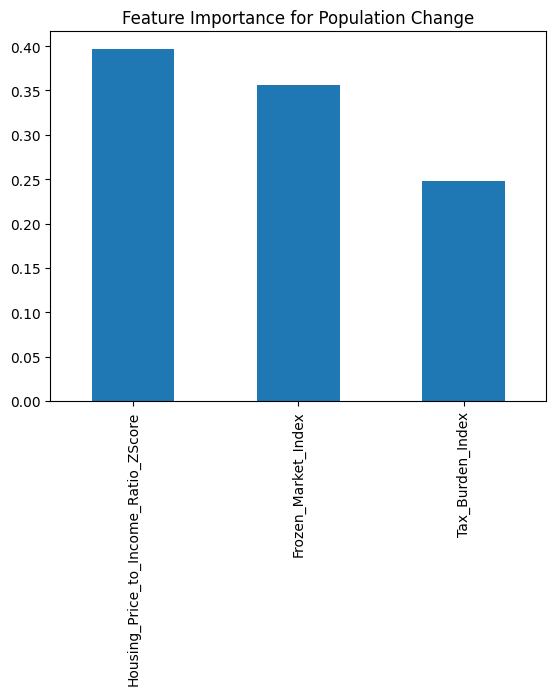

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Calculate correlation with Population Change
correlations = All_Stats_df.corr(numeric_only=True)['Population_Change_Rate'].sort_values(ascending=False)
print(correlations)

import statsmodels.api as sm

# Define features and target
X = All_Stats_df[[
    'Frozen_Market_Index',
    'Housing_Price_to_Income_Ratio_ZScore',
    'Tax_Burden_Index'
]]
y = All_Stats_df['Population_Change_Rate']

# Add constant (intercept)
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())


rf = RandomForestRegressor()
rf.fit(X.drop(columns='const'), y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.drop(columns='const').columns)
importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance for Population Change')
